# Projet 1

In [1]:
import re
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy
import math
from community import community_louvain as louvain

In [2]:
book =  open("LOTR_ReturnOfTheKing.txt").read()
book_chapters = re.split(r"_Chapter \w+_",book)[1:]

In [3]:
Characters = [["aragorn","strider","the heir of isildur","king of gondor"], 
              ["arwen", "queen of gondor","evenstar"],
              ["bill ferny"], ["bilbo"],["boromir"], 
              ["beregond"],["bergil"],["butterbur","barliman"],
              ["celeborn", "lord of lothlórien"],
              ["denethor","steward of gondor"],
              ["elanor"],["elendil"],
              ["elladan"],
              ["elrond"],
              ["éomer"],["erestor"],
              ["éowyn","lady of rohan"],
              ["elrohir"],
              ["finduilas"],
              ['fredegar bolger',"fatty","fredegar"], 
              ["frodo","underhill"],
              ["gollum", "sméagol"],
              ["gwaihir"],
              ["faramir"],
              ["galadriel"],
              ["gandalf","mithrandir", "white rider","grey fool"],
              ["gimli"],
              ["glorfindel"],
              ["gothmog", "the lieutenant of morgul"],
              ["gríma","wormtongue"],
              ["imrahil","prince imrahil"],
              ["isildur"],
              ["king of the dead", "king of the mountains"],
              ["legolas"],
              ["lord of the nazgul","ringwraiths","black rider", "king of angmar"],
              ["lotho"],
              ["merry","meriadoc","brandybuck"],
              ["pippin","peregrin","tooks"],
              ["robin", "smallburrow"],
              ["rose cotton", "rosie"],
              ["sam","samwise","gamgee"],
              ["saruman"],
              ["sauron","lord of mordor","lord of the dark tower"],
              ["shadowfax"],
              ["shagrat"],
              ["shelob"],
              ["snaga"],
              ["the lieutenant of the tower","the mouth of sauron"],
              ["tom cotton","farmer cotton" ],
              ["théoden","king of the mark","lord of the mark"],
              ["treebeard","fangorn"],
              ["wídfara"]]

In [4]:
FirstName = [el[0] for el in Characters]
#print(FirstName)
#len(FirstName)

In [5]:
cleanedCharacters = [] # Les espaces des personnages avec des noms composés sont rempacés par des tirets-bas "_"

for i in Characters:
    new_sublist=[]
    for j in i:
        remplace = j.replace(" ","_")
        new_sublist.append(remplace)
    cleanedCharacters.append(new_sublist)

# Je réatribue à Character les personnages nettoyer
#print(len(Characters))

In [6]:
## CLEANING 

cleaned_parag =[]
for ChapterNb, Chapter in enumerate(book_chapters):
    paragraphsEnsemble = Chapter.split('\n\n')
    for parag in paragraphsEnsemble :
        parag_new = re.sub(r"[!?',;.:']", ' ', parag)
        cleaned_parag.append(parag_new.lower())
        
cleaned_final_parag=[] # Je remplace les paragraphes par des paragraphes avec les noms nettoyer.
for parag in cleaned_parag:
    remplace = parag
    for perso in range(len(Characters)):
        for nom in range(len(Characters[perso])):
            remplace = remplace.replace(Characters[perso][nom], cleanedCharacters[perso][nom])
    cleaned_final_parag.append(remplace)

cleaned_parag = cleaned_final_parag
#print(len(cleanedCharacters))
Characters = cleanedCharacters

#print(cleaned_parag)
#print(Characters)
#print(cleaned_parag)

Data transformation

In [7]:
CoocMatrix ={}
OccurenceList={} # number of times a characters is present
for parag in cleaned_parag: # Per paragraph, check if words are a Character
    List = []
    for w in parag.split(): # parcourir chaque mot
        for perso in Characters: # parcourir chaque personnage
            if w in perso: # si w fait parti de l'un des noms du personnagen alors on le met égal à son FirstName, ici = perso[0]
                w = perso[0]
                if w not in List:
                    List.append(w)
    List = sorted(List) # permet de garder toujours le même ordre pour avoir les clefs dans CoocMatrix
    n = len(List)
    for i in range(n):
        for j in range(i,n):
            if(i==j):
                OccurenceList[List[i]] = OccurenceList.get((List[i]) ,0)+1
            else:
                CoocMatrix[(List[i],List[j])] = CoocMatrix.get((List[i],List[j]) ,0)+1

Coocumatrix is [52 rows x 52 columns]

Using this matrix, I am able to create two lists-One for the edges for the diagram represented in a tuple of form: (char1, char2, co-occurrence weight). I decided to make each weight a decimal in relation to the max occurrence seen: M

In [8]:
# M : Weight regulirizator
#M = df.to_numpy().max()
MostFrequentCharac = max(OccurenceList, key=OccurenceList.get)
print(MostFrequentCharac)
M = OccurenceList[MostFrequentCharac]
M

gandalf


71

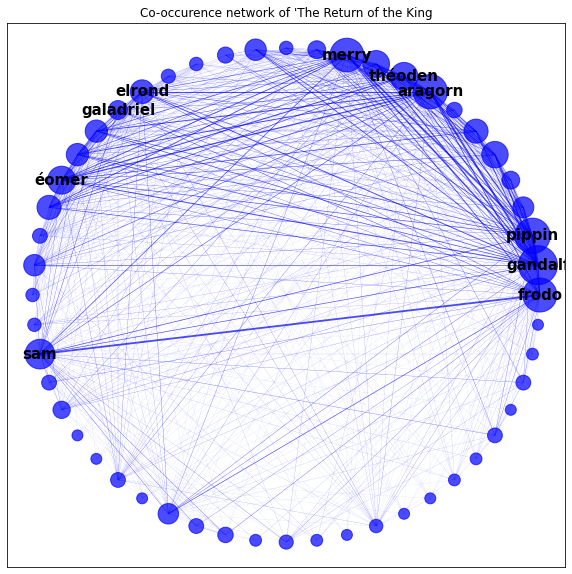

In [22]:
G = nx.Graph()

## NODES 
NodesSize = list(OccurenceList.values()) # les occurences de chaque perso
G.add_nodes_from(OccurenceList.keys())
nx.draw_networkx_nodes(G,
                       pos= nx.circular_layout(G, scale =4) ,
                       node_size=[100 + x*20 for x in NodesSize],
                       node_color='b',
                       alpha=0.7
                      )

## EDGES
for (key1,key2) in CoocMatrix:
    G.add_edge(key1, key2, weight=CoocMatrix[key1,key2]/20) # 20 is just a constant to make the graph clearer
    weights = [G[u][v]['weight'] for u,v in G.edges()]
    
nx.draw_networkx_edges(G,
                       pos=nx.circular_layout(G, scale =4), 
                       width = weights,
                       edge_color='blue',
                       alpha=0.7)


## LABELS : Affficher noms avec le + de connections",
LabelsToShow = {}
proportion_to_be_not_shown = 0.80


FirstCleanedCharacters = []
for perso in cleanedCharacters :
    FirstCleanedCharacters.append(perso[0])

NombreEdge={}
for i in FirstCleanedCharacters :
    for key in CoocMatrix:
        if i in key :
            NombreEdge[i] = NombreEdge.get(i,0)+1




quantile = np.quantile(list(NombreEdge.values()), proportion_to_be_not_shown)            

for k in NombreEdge: # if do with regard to the most connected nodes",
    if NombreEdge[k] > quantile:
        LabelsToShow[k] = k
        
nx.draw_networkx_labels(G, 
                        pos=nx.circular_layout(G, scale =4),
                        labels=LabelsToShow,
                        font_size=15, 
                        font_weight='bold')

## Image parameters
plt.rcParams['figure.figsize'] = [10, 10]
plt.title("Co-occurence network of 'The Return of the King")
plt.show()




- Assortativity

In [10]:
globalGraphAssort = round(nx.degree_assortativity_coefficient(G),3)
print(globalGraphAssort)

-0.232


This means that in our graph, nodes with a higher degree have a lower propensity to connect to nodes of similar degree than nodes with a lower degree. This is most notably the case in hierarchical networks.

Text(0, 0.5, 'Frequency')

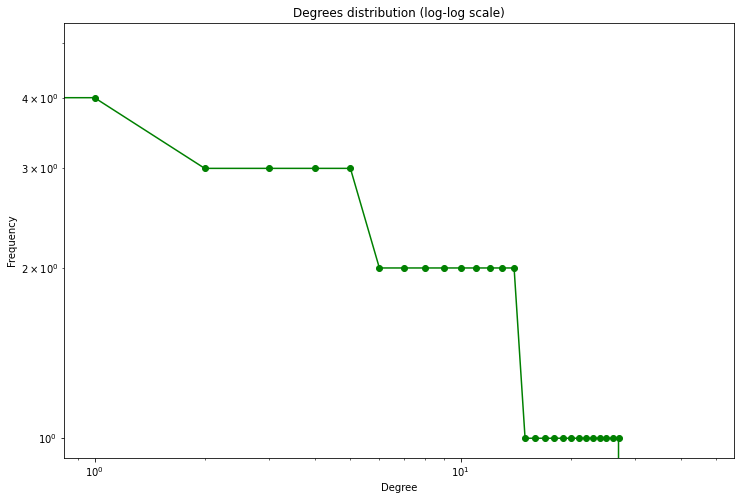

In [11]:
degrees_freq = sorted(nx.degree_histogram(G), reverse=True)
degrees = range(len(degrees_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees, degrees_freq,'-go') 
plt.title("Degrees distribution (log-log scale)")
plt.xlabel('Degree')
plt.ylabel('Frequency')

## Characters' count graph

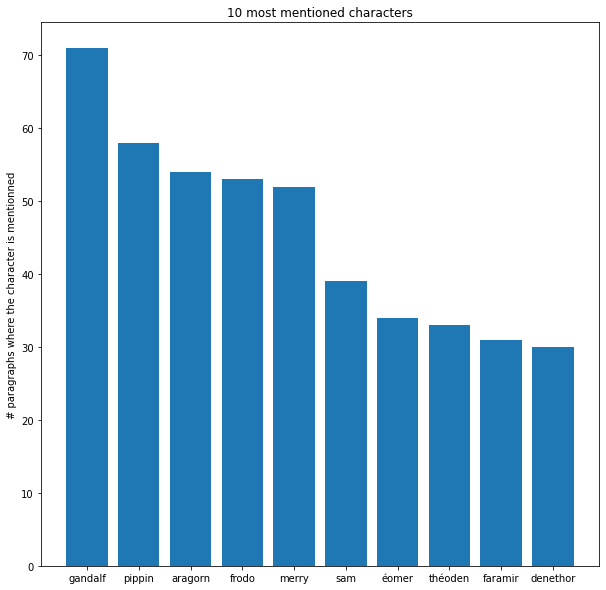

In [12]:
SortedCharOccurencesDic = (dict(sorted(OccurenceList.items(), key=lambda item: item[1], reverse=True)))
plt.bar(x=list(SortedCharOccurencesDic.keys())[:10], height=list(SortedCharOccurencesDic.values())[:10] )
plt.title("10 most mentioned characters")
plt.ylabel("# paragraphs where the character is mentionned")

plt.rcParams['figure.figsize'] = [10, 5]

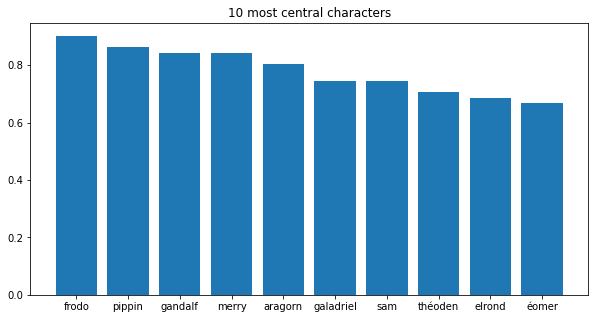

In [13]:
DegrCentr = nx.degree_centrality(G) # return a dictionnary

SortedDegrCentrDic = (dict(sorted(DegrCentr.items(), key=lambda item: item[1], reverse=True)))
plt.bar(x=list(SortedDegrCentrDic.keys())[:10], height=list(SortedDegrCentrDic.values())[:10] )
plt.title("10 most central characters")
#plt.ylabel("# paragraphs where the character is mentionned")

plt.rcParams['figure.figsize'] = [10, 5]

Les 10 personnages centraux sont les 10 personnages qui ont le plus de connexion avec les autres, normalisé par le nombre maximum de connexion qu'il pourrait y avoir. Par exemple, Frodo a 46 connexion (voir K-core decomposition) sur 52 possible, il a donc un score de 0.88.

The degree centrality for a node v is the fraction of nodes it is connected to..
The degree centrality values are normalized by dividing by the maximum possible degree in a simple graph n-1 where n is the number of nodes in G.
The graph above is different from the previous graph because it measures the centrality of the characters by the number of unique links rather than naive links count.
More on that on https://www.sciencedirect.com/topics/computer-science/degree-centrality 

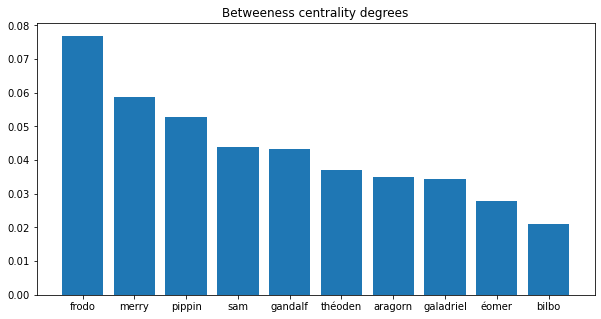

In [14]:
BtwnessCentralityDict = nx.betweenness_centrality(G, k=None, normalized=True, weight=None,endpoints=False,seed=None)

SortedBtwnessCentralityDict= (dict(sorted(BtwnessCentralityDict.items(), key=lambda item: item[1], reverse=True)))
plt.bar(x=list(SortedBtwnessCentralityDict.keys())[:10], height=list(SortedBtwnessCentralityDict.values())[:10] )
plt.title("Betweeness centrality degrees")
#plt.ylabel("# paragraphs where the character is mentionned")

plt.rcParams['figure.figsize'] = [10, 5]

This metric measures how important a node is to the shortest paths through the network.

- Clustering coefficient distri et average CC

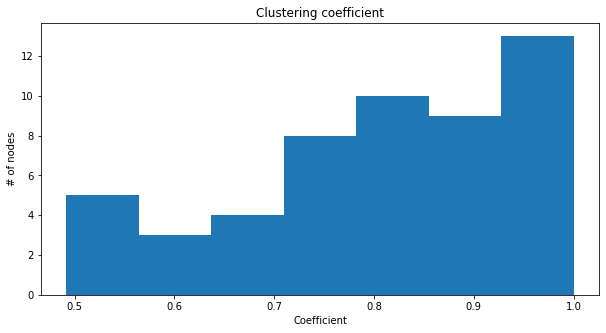

0.81


<Figure size 720x360 with 0 Axes>

In [15]:
# Draw histogram of clustering coefficient
clust_coeffs = list(nx.clustering(G).values())
Average_clustering = round(np.mean(clust_coeffs),2)

plt.hist(clust_coeffs, bins="auto")
plt.ylabel("# of nodes")
plt.xlabel("Coefficient")
plt.title("Clustering coefficient")
plt.show()
plt.clf()

print(Average_clustering)

# Part II: Communities detection

## Louvain Algorithm

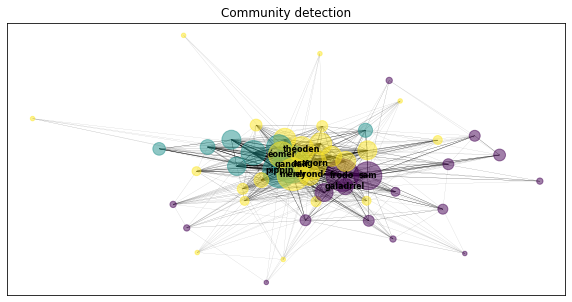

modularity: 0.15


In [16]:
# retrun Louvain partition as a dict
partition = louvain.best_partition(G)
# visualization

pos = nx.spring_layout(G,
                       scale=4,
                       k=None, pos=None, fixed=None, iterations=50, 
                       threshold=0.0001, weight='weight', center=None, dim=2, seed=None
                      )
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
## NODES
nx.draw_networkx_nodes(G, 
                       pos, 
                       partition.keys(),
                       node_size=[x*20 for x in NodesSize],
                       cmap=cmap,
                       node_color=list(partition.values()),
                       alpha=0.5)

## EDGES
nx.draw_networkx_edges(G, 
                       pos,
                       width = weights,
                       alpha=1)

nx.draw_networkx_labels(G, 
                        pos,
                        labels=LabelsToShow,
                        font_size=8, 
                        font_weight='bold')

plt.title("Community detection")
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

LouvainOutputModularity = louvain.modularity(partition, G)
print("modularity: " + str(round(LouvainOutputModularity,3)))

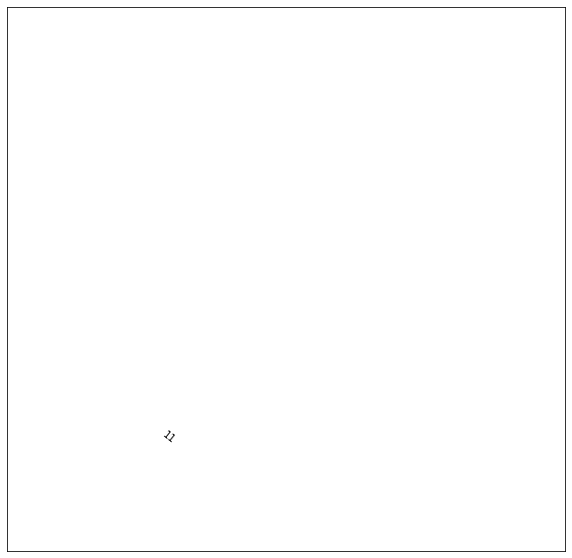

In [17]:
ind = louvain.induced_graph(partition,G)


"""nx.draw(ind,
        node_color= [1,2,3],
        with_labels = True)"""


##EDGES LABEL
# Rounding of weights: loop to iterate for values 
labelsInducedGrapah = dict()
for key in nx.get_edge_attributes(ind,'weight'):
    # rounding to K using round()
    labelsInducedGrapah[key] = round(nx.get_edge_attributes(ind,'weight')[key])

nx.draw_networkx_edge_labels(ind, pos=nx.spring_layout(ind,k=None, pos=None, fixed=None, iterations=50, 
                                                       threshold=0.0001, weight='weight', scale=1, center=None, 
                                                       dim=2, seed=None), 
                             
                             edge_labels=labelsInducedGrapah, label_pos=0.5, 
                             font_size=10, font_color='k', font_family='sans-serif', font_weight='normal', 
                             alpha=None, bbox=None, horizontalalignment='center', verticalalignment='center', 
                             ax=None, rotate=True)




plt.rcParams['figure.figsize'] = [5,5]
plt.show()

## K-Core Decompositon

In [18]:
# Dictionnaire qui regroupe tous les personnages, et le nombre de contact qu'ils ont

FirstCleanedCharacters = []
for perso in cleanedCharacters :
    FirstCleanedCharacters.append(perso[0])

    
NombreEdge={}
for i in FirstCleanedCharacters :
    for key in CoocMatrix:
        if i in key :
            NombreEdge[i] = NombreEdge.get(i,0)+1

NeighboursOfEachPerso = {}

for name in FirstCleanedCharacters:
    for name_1,name_2 in CoocMatrix:
        # si le nom est égale au premier
        if name == name_1:
            if name_1 not in NeighboursOfEachPerso.keys():
                NeighboursOfEachPerso[name_1] = [name_2]
            else:
                NeighboursOfEachPerso[name_1].append(name_2)
        elif name == name_2:
            if name_2 not in NeighboursOfEachPerso.keys():
                NeighboursOfEachPerso[name_2] = [name_1]
            else:
                NeighboursOfEachPerso[name_2].append(name_1)
                
#print(NeighboursOfEachPerso)
            
            


In [19]:
#### Initialisation ###

# On veut d'abord créer un dictionnaire qui regroupe tous les personnages, et le nombre de contact qu'ils ont
#      On appelle ce dictionnaire NombreEdge

#Pour cela, on a besoin de la liste de tous les personnages cleanés
FirstCleanedCharacters = []
for perso in cleanedCharacters :
    FirstCleanedCharacters.append(perso[0])

#On crée le dictionnaire
NombreEdge={}
for i in FirstCleanedCharacters :
    for key in CoocMatrix:
        if i in key :
            NombreEdge[i] = NombreEdge.get(i,0)+1

#print(max(NombreEdge, key=NombreEdge.get))



# On veut maintenant créer un dictionnaire qui pour chaque personnage i, associe l'ensemble des personnages J avec qui
#.    le personnage i est en contact. On appelle ce dictionnaire NeighboursOfEachPerso.
NeighboursOfEachPerso = {}

for name in FirstCleanedCharacters:
    for name_1,name_2 in CoocMatrix:
        # si le nom est égale au premier
        if name == name_1:
            if name_1 not in NeighboursOfEachPerso.keys():
                NeighboursOfEachPerso[name_1] = [name_2]
            else:
                NeighboursOfEachPerso[name_1].append(name_2)
        elif name == name_2:
            if name_2 not in NeighboursOfEachPerso.keys():
                NeighboursOfEachPerso[name_2] = [name_1]
            else:
                NeighboursOfEachPerso[name_2].append(name_1)

#print("oui")
#print(min(NombreEdge, key=NombreEdge.get))
#print(NombreEdge)

# On initalise le dictionnaire pruned, qui associe à chaque personnage le boolean False
pruned = {}
for i in FirstCleanedCharacters :
    pruned[i] = False

# On initialise le nombre total de pruned, k, les shells et Degre (on utilise Degre car ce dictionnaire va être 
#.    modifié, et l'on veut garder NombreEdge intact pour la suite.)
total_pruned = 0
k=1
shells = []
Degre = NombreEdge


#Algorithm K-core decomposition :

while total_pruned < len(NombreEdge):# We need G = dictionnaire qui regroupe tous les personnages, et le nombre de contact qu'ils ont
    to_prune = []
    for key in NombreEdge :
        if NombreEdge[key] == k :
            to_prune.append(key)
    k_shell = []
    while len(to_prune)>0:
        i = to_prune.pop(0)
        for j in NeighboursOfEachPerso[i]:
            if pruned[j] == False :
                Degre[j]-=1
                if Degre[j] == k:
                    to_prune.append(j)
        pruned[i] = True
        k_shell.append(i)
        total_pruned+=1
    shells.append(k_shell)
    k+=1

print(shells)




[[], [], ['gothmog'], [], ['finduilas', 'snaga', 'wídfara'], ['gwaihir', 'robin'], [], [], ['shagrat'], ['bill_ferny', 'erestor', 'fredegar_bolger', 'glorfindel'], ['elanor', 'shelob', 'tom_cotton', 'rose_cotton'], ['bergil', 'lotho', 'the_lieutenant_of_the_tower'], ['gollum', 'king_of_the_dead'], ['butterbur'], [], [], [], ['boromir', 'beregond', 'gríma', 'lord_of_the_nazgul'], ['bilbo'], ['elladan', 'isildur', 'elendil', 'elrohir', 'sauron', 'treebeard', 'shadowfax', 'arwen', 'celeborn', 'aragorn', 'elrond', 'gandalf', 'gimli', 'legolas', 'merry', 'pippin', 'théoden', 'éomer', 'éowyn', 'denethor', 'faramir', 'imrahil', 'frodo', 'sam', 'saruman', 'galadriel']]


In [20]:
# Comparaison de l'algorithme K-core à la build-in fonction du package NetworkX
print(nx.k_core(G,2))
